<a href="https://colab.research.google.com/github/sagar625/Artificial-Intelligence-2-Assesment/blob/master/CA2_SagarGoswami_L00150480.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Assesment 2. 

---



---



Name: Sagar Goswami.
Student number: L00150480

---



---
**Q1**
  * Topic Modeling using Linear discriminant analysis (LDA)

  * Topic Modeling using Non-negative matrix factorization(NMF) with include two techniques 'Generalized Kullback-Leibler divergence' and 'Frobenius norm'.

  * Term frequency and Inverse documnet frequency (Td-idf) and Count Vector or simply Term frequency as Text Features.

  * Spacy library is also used for text tokenization and preprocessing like Stopword removal, Lemmatization, Punctuation removal.

  * Topic modeling code can be configured for samples, features, components and top words.

  * Log Likelihood:  -15551059.92269141 and Perplexity:  4517.373157543353 is achieved for LDA.

* I created the labeled dataset with 4,000,00 records and chose NMF topics to create the labeled dataset.Visualization of word count of frequent words was less informative so I decided to keep out of the assignment.



In [5]:
# I love Colab.
from google.colab import files
uploaded = files.upload()

Saving quora_questions.csv to quora_questions.csv


Loading dataset...
done in 1.019s.
Extracting tf-idf features for NMF...
done in 19.388s.
Extracting tf features for LDA...
done in 18.346s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=200000 and n_features=10000...
done in 24.920s.

Topics in NMF model (Frobenius norm):
Topic #0: quora question answer ask google need improvement delete mark post easily interview add follow user search writer view googling picture use write topic instead stupid change collapse come block profile
Topic #1: money online earn black note youtube rupee easy ban home r free help make internet investment way job website curb start bank corruption video app invest save site market quora
Topic #2: life purpose important change live real moment day want earth work happy death lesson decision planet balance thing experience department position regret differ wrong embarrass human big think happen sex
Topic #3: learn language programme start book machine python beginner java code hack wa

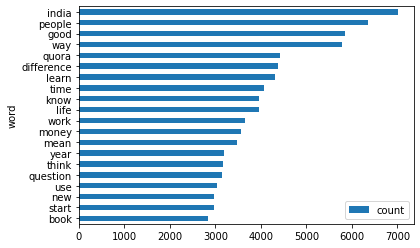

In [6]:
#Importing required Libraries
from time import time
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load(disable=["tagger", "parser", "ner"])
nlp.max_length = 2000000


# The original file have 800000 samples and this configuration can be used to create configured models.
n_samples = 200000 #using half of the data.
n_features = 10000 #Number of TF-IDF or TF Features.
n_components = 13 #The grid search gives 10 as best parameter.
n_top_words = 30  # Top words to decide the category of the Topic.


# New stop words list 
customize_stop_words = ['well', 'thing', 'like']

# Mark them as stop words
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

def spacy_tokenizer(sentence):
    ''' Tokenize the questions. Lemmetize the tokens and remove Stopwords, Puncuations, Spaces and unit length words.'''
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]


def print_top_words(model, feature_names, n_top_words):
    '''To print the N top words from given number of Topics'''
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print("Loading dataset...")
t0 = time()
data = pd.read_csv("quora_questions.csv")  #Loading data having 808578 questions.
data_samples = data.question
data_samples = data_samples[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer,max_df=0.95, min_df=2,
                                   max_features=n_features,stop_words='english'
                                    )
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples.values.astype('U'))
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(tokenizer=spacy_tokenizer,max_df=0.95, min_df=2,
                                max_features=n_features,stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples.values.astype('U'))
print("done in %0.3fs." % (time() - t0))
print()


# most frequent words
word_count = pd.DataFrame({'word': tf_vectorizer.get_feature_names(), 'count': np.asarray(tf.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')


# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf_fn = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf_fn, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf_kl = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf_kl, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("Log Likelihood: ", lda.score(tf))
print("Perplexity: ", lda.perplexity(tf))
print("done in %0.3fs." % (time() - t0))

print("\n\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

**Hyper Parameter Tuning for LDA model. **

In [47]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda_comparison = LatentDirichletAllocation()

# Init Grid Search Class
lda_comparison = GridSearchCV(lda_comparison, param_grid=search_params)

# Do the Grid Search
lda_comparison.fit(data_vectorized)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [49]:
# Best Model which gave highest score 
best_lda_model = lda_comparison.best_estimator_

# Model Parameters is used to store a list of parameter settings dicts for all the parameter candidates
print("Best Model's Params: ", lda_comparison.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_comparison.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -1583487.353511311
Model Perplexity:  2526.2382431927385


In [65]:
tf.shape,tfidf.shape

((400000, 31703), (400000, 31703))

#Creating Labeled Dataset 



In [7]:
frame = {'question': data_samples } 
  
question_df = pd.DataFrame(frame) 

question_df.head(),len(question_df)



(                                            question
 0  What is the step by step guide to invest in sh...
 1  What is the story of Kohinoor (Koh-i-Noor) Dia...
 2  How can I increase the speed of my internet co...
 3  Why am I mentally very lonely? How can I solve...
 4  Which one dissolve in water quikly sugar, salt..., 200000)

In [9]:
textfile_topics = nmf_fn.transform(tfidf)
topic_list = []
# Textfile_topics is a list of arrays containing 
# all index positions of words for each textfile
for popular_index_pos in textfile_topics:
    # Get the max index position in each array
    # and add to the topic_list list
    topic_list.append(popular_index_pos.argmax())

# Add a new column to the dataframe
question_df["Topic number"] = topic_list

question_df.head()

,question,Topic number
0,What is the step by step guide to invest in sh...,4
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0
2,How can I increase the speed of my internet co...,8
3,Why am I mentally very lonely? How can I solve...,0
4,"Which one dissolve in water quikly sugar, salt...",0


In [0]:
topic_list = {0: " Major Concepts ", 
              1: "Education,Schools & Learning", 
              2: "Business, Work and Careers", 
              3: "Life Self", 
              4: "News, Entertainment & Pop culture", 
              5: "Recreation, Sports, Travel & Activities", 
              6: "Politics, Law, Government, and Judiciary", 
              7: "Medicine & Healthcare", 
              8: "Relationship", 
              9: "Humanities", 
              10: "Literature, Languages & Communication", 
              11: "Major Concepts", 
              12: "Languages" }

topic_no_to_topic = question_df["Topic number"].map(topic_list)
question_df["Topic desc"] = topic_no_to_topic

In [11]:
question_df.head(20)

,question,Topic number,Topic desc
0,What is the step by step guide to invest in sh...,4,"News, Entertainment & Pop culture"
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,0,Major Concepts
2,How can I increase the speed of my internet co...,8,Relationship
3,Why am I mentally very lonely? How can I solve...,0,Major Concepts
4,"Which one dissolve in water quikly sugar, salt...",0,Major Concepts
5,Astrology: I am a Capricorn Sun Cap moon and c...,0,Major Concepts
6,Should I buy tiago?,4,"News, Entertainment & Pop culture"
7,How can I be a good geologist?,10,"Literature, Languages & Communication"
8,When do you use ã‚· instead of ã—?,11,Major Concepts
9,Motorola (company): Can I hack my Charter Moto...,4,"News, Entertainment & Pop culture"


In [0]:
#Saving the labled data as quora_supervised
from google.colab import files
question_df.to_csv('quora_supervised.csv',sep='\t', encoding='utf-8') 
files.download('quora_supervised.csv')

Q 2
**Supervised Machine learning**

The best performing algorithm can be chosen by creating confusion matrix or finding evaluation matrix and calculate Accuracy, Precision, Recall and F1 score.






In [13]:
#Impoting required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

#Spiltting data into input features and corresponding outputs
sentences = question_df['question'].values
y = question_df['Topic number'].values

#Spiltting data into Train and Test.
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# Creating term frequency matrix
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train.astype('U'))

X_train = vectorizer.transform(sentences_train.astype('U'))
X_test  = vectorizer.transform(sentences_test.astype('U'))
X_train

<150000x44693 sparse matrix of type '<class 'numpy.int64'>'
	with 1494343 stored elements in Compressed Sparse Row format>

In [14]:
# Creating a Classifier using Logistic Regression.
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)


Accuracy: 0.92546


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Creating a Confusion Matrix for model evaluation.

In [139]:
from sklearn import metrics
predictions = classifier.predict(X_test)
predictions
print(metrics.confusion_matrix(y_test,predictions))
# # You can make the confusion matrix less confusing 

[[6504  158   61  115   76  124   26   92   85  116   43   66  301]
 [ 138 6986  122  126   59   85   36  160  194  130   53   55  198]
 [  71  120 4651   49  110   47   30  108   27   66   15   33   67]
 [  78   84   28 6619  248  230   77  172   86  129   42  195  173]
 [  86  109   95  240 7198  114   86  184  128  102   49  104  119]
 [  99   71   26  214   80 8322  111  111   64  119   34  166  110]
 [  50   45   28  100   73  120 5545  139   31   71   33   94   81]
 [  84  163   74  149  168  103   93 6820  170  101   39  113  279]
 [  87  181   28  107  104  109   24  183 7192  121   65   72  144]
 [ 164  202   84  195  141  167   65  218  152 5695  103  195  211]
 [  58   70   31   95   79   84   33   44   65   90 3648   56  150]
 [  64   86   43  233  122  191  100  168  108  188   44 5725  243]
 [ 153  196   51  193  132  139   56  246  104  164   79  161 7928]]


Classification Report of Logistic Regression

In [145]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7767
           1       0.82      0.84      0.83      8342
           2       0.87      0.86      0.87      5394
           3       0.78      0.81      0.80      8161
           4       0.84      0.84      0.84      8614
           5       0.85      0.87      0.86      9527
           6       0.88      0.87      0.87      6410
           7       0.79      0.82      0.80      8356
           8       0.86      0.85      0.86      8417
           9       0.80      0.75      0.78      7592
          10       0.86      0.81      0.83      4503
          11       0.81      0.78      0.80      7315
          12       0.79      0.83      0.81      9602

    accuracy                           0.83    100000
   macro avg       0.83      0.83      0.83    100000
weighted avg       0.83      0.83      0.83    100000



In [0]:
from sklearn.svm import SVC
# Setting gamma to "auto", otherwise the SVC model 
# returns an error
svc_model = SVC(gamma="auto")
svc_model.fit(X_train, y_train)

svc_model_predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, svc_model_predictions))

In [0]:
from sklearn.ensemble import RandomForestClassifier


# Create an instance of the model - common model for text data and spam filtering
rf_model = RandomForestClassifier()

# Fit model to training data
rf_model.fit(X_train, y_train)

# Predict answers to data from the X_text dataset
# containing text length and punctuation count
rf_model_predictions = rf_model.predict(X_test)

# Show results in a confusion matrix
print(metrics.confusion_matrix(y_test,rf_model_predictions))

In [16]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,rf_model_predictions))


[[10119     8    21    42    74   148     3    18    35     4   133    26
      0]
 [  127  1599     1     6    25    42     0     3     9     0    39     9
      0]
 [  267     4  1916     4    33    73     0    13     5     2    41    14
      0]
 [  313    10    12  2214    50    81     0     6    14     3    76    25
      3]
 [  835    10    19    28  5070    89     0    20    17     6   156    28
      0]
 [  425     3    20     9    82  5899     2    19    23     2   105    26
      0]
 [   82     4     8     2     7    32  1090     1     3     5    14    16
      1]
 [  195     2     4     1    50    31     2  1735     5     1    20     8
      0]
 [  377     6     5    15    46    99     2     6  2724     0    44    14
      1]
 [   46     0     1     0    12     4     0     0     1  1121     6     0
      0]
 [  603    21    14    43   112   178     2    15    40     4  6100    29
      1]
 [  372     2    22     4    53   106     3     8    14     1    40  2749
      0]
 [  

Classification report of Random_Forest

In [19]:
print(metrics.classification_report(y_test,rf_model_predictions))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10631
           1       0.96      0.86      0.91      1860
           2       0.94      0.81      0.87      2372
           3       0.93      0.79      0.85      2807
           4       0.90      0.81      0.85      6278
           5       0.87      0.89      0.88      6615
           6       0.99      0.86      0.92      1265
           7       0.94      0.84      0.89      2054
           8       0.94      0.82      0.87      3339
           9       0.97      0.94      0.96      1191
          10       0.90      0.85      0.87      7162
          11       0.93      0.81      0.87      3374
          12       0.99      0.77      0.87      1052

    accuracy                           0.86     50000
   macro avg       0.92      0.85      0.88     50000
weighted avg       0.88      0.86      0.86     50000



In [21]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the model - common model for text data and spam filtering
nb_model = MultinomialNB()

# Fit model to training data
nb_model.fit(X_train, y_train)

# Predict answers to data from the X_text dataset
# containing text length and punctuation count
nb_model_predictions = nb_model.predict(X_test)

# Show results in a confusion matrix
print(metrics.confusion_matrix(y_test,nb_model_predictions))

[[7953   50   49   83  602  667    7   68  161   42  778  168    3]
 [ 108 1155    8   61  128  111    0    5   41    1  200   41    1]
 [ 192    8 1449   17  146  325    1   13   27    4  132   58    0]
 [ 202    6   22 1860  161  174    1    6   38    5  293   32    7]
 [ 355   54   21   39 4925  235    2   38   34   13  474   88    0]
 [ 273   21   55   54  284 5363    4   24   75   17  334  111    0]
 [ 103    8   54   15   21  157  810    6    8    5   46   29    3]
 [ 122    1   30    6  225  131    0 1403   11    1   88   36    0]
 [ 237   39   16   59  125  248    1   10 2360    0  197   44    3]
 [  35    0    8    3   42   17    1    1    2 1048   25    8    1]
 [ 287   31   42   94  246  327    3   23   81    3 5945   74    6]
 [ 442    9   31   25  203  343    2   25   53    1  117 2123    0]
 [  75    1    5   64   43   32   11    8   22    2  161   29  599]]


Classification Report of Naive Bayes.

In [25]:
print(metrics.classification_report(y_test,nb_model_predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     10631
           1       0.84      0.62      0.71      1860
           2       0.81      0.61      0.70      2372
           3       0.78      0.66      0.72      2807
           4       0.69      0.78      0.73      6278
           5       0.66      0.81      0.73      6615
           6       0.96      0.64      0.77      1265
           7       0.86      0.68      0.76      2054
           8       0.81      0.71      0.75      3339
           9       0.92      0.88      0.90      1191
          10       0.68      0.83      0.75      7162
          11       0.75      0.63      0.68      3374
          12       0.96      0.57      0.72      1052

    accuracy                           0.74     50000
   macro avg       0.81      0.71      0.74     50000
weighted avg       0.75      0.74      0.74     50000



Creating a Deep Neural Architecture for Text Classification.

In [22]:
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
from numpy import array

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [23]:
 model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                446940    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 446,951
Trainable params: 446,951
Non-trainable params: 0
_________________________________________________________________


In [0]:
 history = model.fit(X_train, y_train,epochs=100,verbose=False,validation_data=(X_test, y_test),batch_size=10)

In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
 loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])